In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fastf1 as ff1
from fastf1.core import Laps
from fastf1 import utils
from fastf1 import plotting
from datetime import timedelta
from timple.timedelta import strftimedelta
from fastf1 import plotting
import datetime


In [57]:
ff1.Cache.enable_cache('../cache') 

In [58]:
melbourne = ff1.get_session(2023, 'Australian','Q')
plotting.setup_mpl()
melbourne.load()


core           INFO 	Loading data for Australian Grand Prix - Qualifying [v2.3.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/home/thalles/.local/lib/python3.11/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/home/thalles/.local/lib/python3.11/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/home/thalles/.local/lib/python3.11/site-packages/fastf1/core.py:1415: FutureWarnin

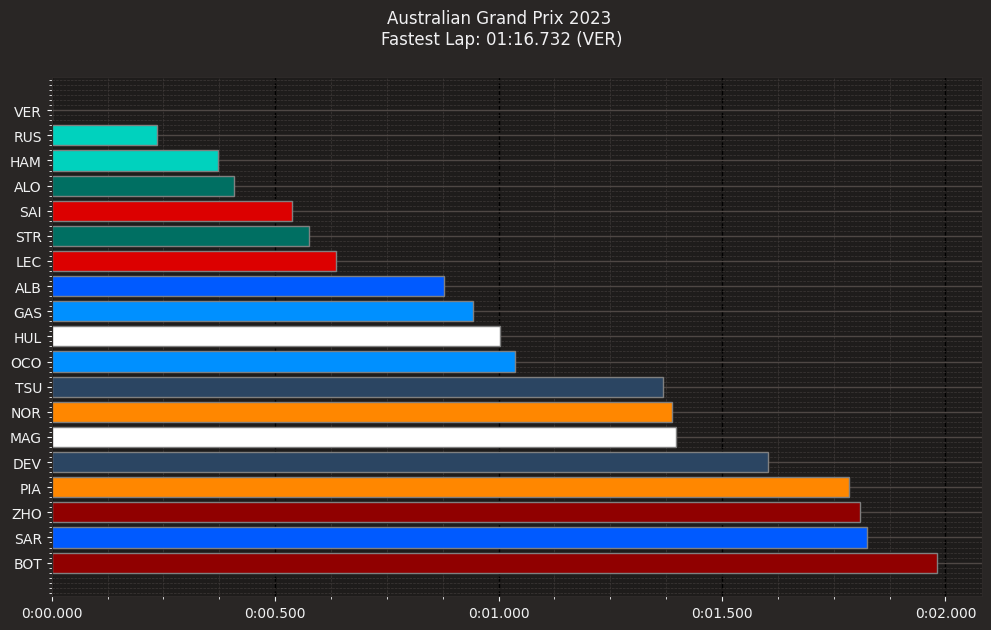

In [59]:
list_fastest_laps = list()    
for drv in melbourne.results['Abbreviation'][:19]:
        drvs_fastest_lap = melbourne.laps.pick_driver(drv).pick_fastest()
        list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    team_colors.append(color)


    
fig, ax = plt.subplots(figsize=(12, 6.75))
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

    # show fastest at the top
ax.invert_yaxis()

    # draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{melbourne.event['EventName']} {melbourne.event.year} \n"
                f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

Team : Red Bull Racing - Driver: VER - TopSpeed: 326 - MeanSpeed: 245.52073450450905, 5233.138055555552 , 76.732
Team : Mercedes - Driver: RUS - TopSpeed: 323 - MeanSpeed: 245.1570652738799, 5241.458055555553 , 76.968
Team : Aston Martin - Driver: ALO - TopSpeed: 318 - MeanSpeed: 243.67743942752708, 5221.398333333336 , 77.139
Team : Ferrari - Driver: SAI - TopSpeed: 323 - MeanSpeed: 244.6011129804581, 5250.09111111111 , 77.27
Team : Williams - Driver: ALB - TopSpeed: 322 - MeanSpeed: 242.37199293896316, 5225.068888888886 , 77.609
Team : Alpine - Driver: GAS - TopSpeed: 321 - MeanSpeed: 242.35869971033176, 5229.225555555561 , 77.675
Team : Haas F1 Team - Driver: HUL - TopSpeed: 327 - MeanSpeed: 242.85949700906946, 5244.078611111115 , 77.735
Team : AlphaTauri - Driver: TSU - TopSpeed: 321 - MeanSpeed: 241.52161999513427, 5239.610277777775 , 78.099
Team : McLaren - Driver: NOR - TopSpeed: 323 - MeanSpeed: 241.25403550992712, 5235.145555555555 , 78.119
Team : Alfa Romeo - Driver: ZHO - Top

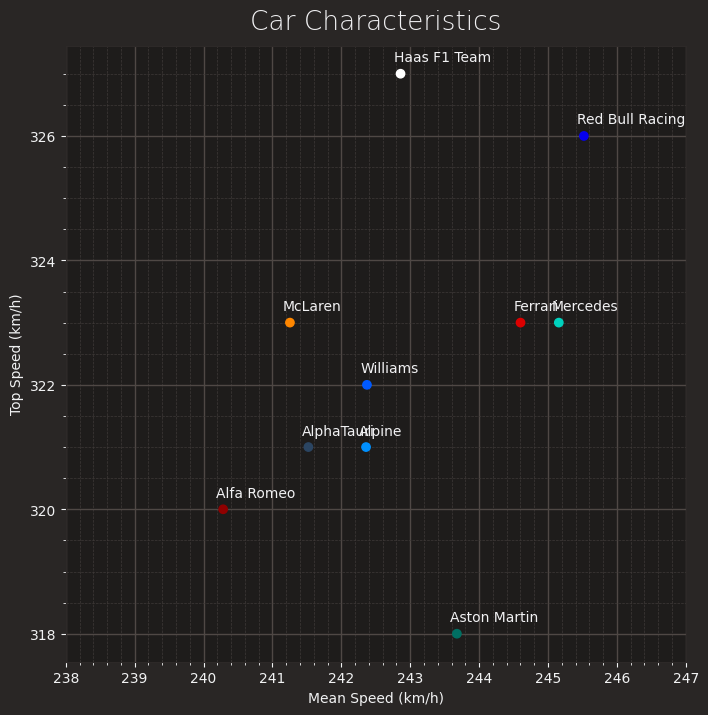

In [60]:
laps = melbourne.laps
df = laps[['Team']].drop_duplicates().reset_index()

plt.rcParams["figure.figsize"] = [8, 8]
high_speed = []
fig, ax = plt.subplots()

for team in df['Team']:
    drv = laps.pick_team(team).pick_fastest()['Driver']
    telemetry = laps.pick_driver(drv).pick_fastest().get_telemetry().add_distance()
    color = ff1.plotting.team_color(team)
    test = telemetry[['Distance', 'Time']]
    print(f"Team : {team} - Driver: {drv} - TopSpeed: {telemetry['Speed'].max()} - MeanSpeed: {((test['Distance'].dropna().max()/test['Time'].dt.total_seconds().dropna().max())) * 3.6}, {test['Distance'].max()} , {test['Time'].dt.total_seconds().max()}")
    high_speed.append((((test['Distance'].max()/test['Time'].dt.total_seconds().max())) * 3.6 ,color, telemetry['Speed'].max(), laps.pick_driver(drv)['Team'].reset_index(drop = True)[0]))

ax.set(xlabel='Mean Speed (km/h)', ylabel= 'Top Speed (km/h)')
plt.scatter(list(zip(*high_speed))[0],list(zip(*high_speed))[2], color = list(zip(*high_speed))[1])

for i in range(len(high_speed)):
    ax.annotate(list(zip(*high_speed))[3][i], (list(zip(*high_speed))[0][i] - 0.1, list(zip(*high_speed))[2][i] + 0.2))

plt.title("Car Characteristics")
plt.xlim([238, 247])
plt.savefig('car_characteristics', dpi=350)


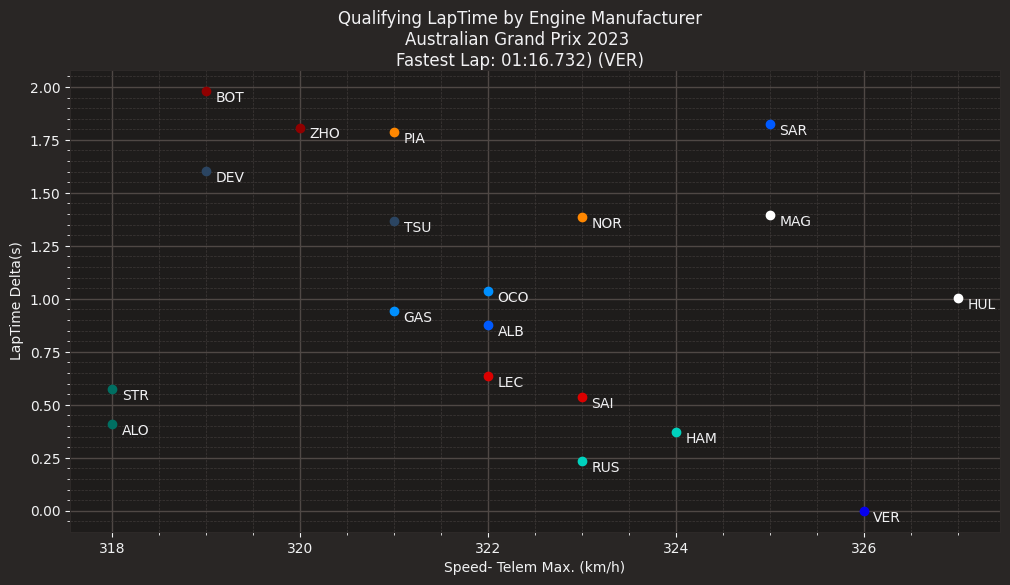

In [25]:
driver_pole = melbourne.laps.pick_driver(melbourne.results['Abbreviation'][0]).pick_fastest()
lap_time_pole_string = strftimedelta( driver_pole['LapTime'], '%m:%s.%ms')
plt.rcParams["figure.figsize"] = [12, 6]
high_speed = []
fig, ax = plt.subplots()

for drv in melbourne.results['Abbreviation'][:19]:
        drv_fastest_lap = melbourne.laps.pick_driver(drv).pick_fastest()
        deltaTime = drv_fastest_lap['LapTime'] - driver_pole['LapTime'] 
        color = ff1.plotting.team_color(drv_fastest_lap['Team'])
        ax.scatter(drv_fastest_lap.get_telemetry()['Speed'].max(), pd.Timedelta(deltaTime).total_seconds(), color = color)
        ax.text(drv_fastest_lap.get_telemetry()['Speed'].max() + 0.1, pd.Timedelta(deltaTime).total_seconds() - 0.05, drv)
ax.set(xlabel='Speed- Telem Max. (km/h)', ylabel= 'LapTime Delta(s)')
plt.suptitle(f"Qualifying LapTime by Engine Manufacturer\n{melbourne.event['EventName']} {melbourne.event.year} \n"
                f"Fastest Lap: {lap_time_pole_string}) ({driver_pole['Driver']})")
plt.savefig('Engine', dpi=350)
